In [1]:
from sqlalchemy import create_engine                                             
from sqlalchemy.orm import sessionmaker                                          
from models import Post, Comment, Topic   

In [2]:
engine = create_engine("sqlite:///test.db",echo=False)
Sess = sessionmaker(bind=engine)
session = Sess()

In [3]:
posts =session.query(Post).all()

In [4]:
from textblob import TextBlob

In [5]:
post1 = TextBlob(posts[530].body)
post1

TextBlob("Based on demand, we might be providing guerrilla sections.
Who should attend:
If you still feel shaky about concepts we covered so far (Propositional logic, Proofs, Inductions, Stable)It's not suitable for people who are looking for advanced exercises 
How these sections will work:
These are not lectures. We'll provide problem sets based common questions TAs get from sections/OH/homework parties.You'll be working in groups, discuss and solve problems together.You'll be helping each other out, making progress as a group (explaining to others will help you further understand concepts).Tutors/readers/TAs will be available to help.

RSVP in the pool below if you are interested:
 [o] Yes I would like to attend")

In [12]:
polarities = []
subjectivities = []
times = []
for post in posts:
    tb = TextBlob(post.body)
    polarities.append(tb.sentiment.polarity)
    subjectivities.append(tb.sentiment.subjectivity)
    times.append(post.time.toordinal())


735981

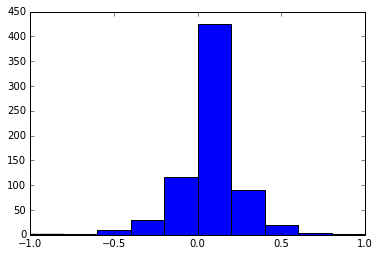

In [11]:
%matplotlib inline
plt.hist(polarities)


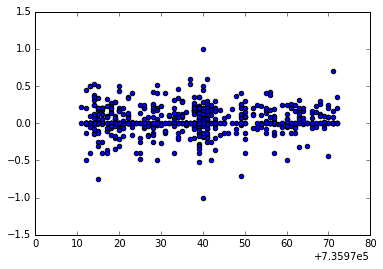

In [14]:
plt.scatter(times,polarities)

(array([ 227.,   36.,   58.,   86.,   89.,   83.,   54.,   18.,   11.,   32.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

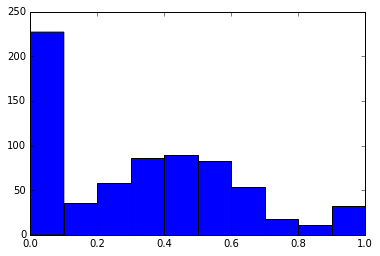

In [108]:
plt.hist(subjectivities)

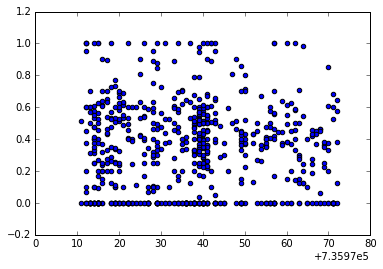

In [15]:
plt.scatter(times,subjectivities)

(array([ 113.,   83.,   72.,   49.,  164.,   38.,   41.,   46.,   41.,   47.]),
 array([ 735981. ,  735987.1,  735993.2,  735999.3,  736005.4,  736011.5,
         736017.6,  736023.7,  736029.8,  736035.9,  736042. ]),
 <a list of 10 Patch objects>)

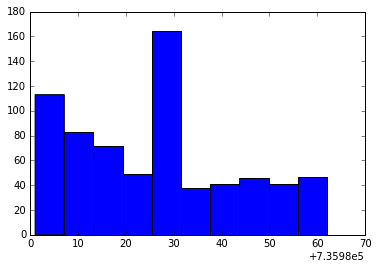

In [17]:
plt.hist(times)

In [20]:
topic = post.topics[0]
topic.name

'student'

In [110]:
from gensim import corpora, models, similarities

In [111]:
texts = [post.body for post in posts]
stoplist = set('for a of the and to in i who what are be is'.split())
texts = [[word for word in text.lower().split() if word not in stoplist] for text in texts]

In [113]:
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1
weeded_texts = [[token for token in text if frequency[token] > 1] for text in texts]


In [114]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


In [115]:
tfidf = models.TfidfModel(corpus)
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=10)
lda = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=10)

In [116]:
doc = "what is graph theory"
vec_bow = dictionary.doc2bow(doc.lower().split())
vec_lsi = lsi[vec_bow]

In [117]:
index = similarities.MatrixSimilarity(lsi[corpus])
sims = index[vec_lsi]
sims

array([ -5.15318848e-02,   7.19737351e-01,   4.30152789e-02,
         4.30152789e-02,   4.30152789e-02,   4.30152789e-02,
         4.30152789e-02,   4.30152789e-02,   2.43958145e-01,
        -1.39826406e-02,  -2.40952726e-02,   1.56950757e-01,
         1.41529098e-01,   4.94604483e-02,   4.35589135e-01,
         4.50120509e-01,   5.48217058e-01,   9.19307619e-02,
         4.30152789e-02,   1.74900353e-01,   6.37101382e-03,
        -1.51006840e-02,  -1.75666045e-02,   6.41887113e-02,
        -4.42003086e-02,   6.59542084e-02,   0.00000000e+00,
         1.93591192e-01,   6.83578104e-02,   1.31756946e-01,
         1.05105206e-01,   9.19105113e-02,   1.86348170e-01,
         0.00000000e+00,   2.12967798e-01,   1.70438707e-01,
         3.20685118e-01,   1.51874974e-01,  -6.85392246e-02,
        -4.20986526e-02,   1.67980418e-01,   1.19099110e-01,
         6.54475112e-03,   2.59564996e-01,   0.00000000e+00,
        -1.10925883e-02,   1.74427591e-02,  -4.69515473e-02,
         5.15914410e-02,

In [122]:
for i in range(10):
    print([q[0] for q in lsi.show_topics(formatted=False)[i][1]])

['that', 'we', 'not', 'this', 'on', 'you', 'if', 'or', '=', 'it']
['you', 'your', 'part', '=', '|', 'students', 'edges', 'graph', 'will', 'questions']
['=', 'we', 'you', 'students', 'part', '0', 'that', 'on', '+', 'not']
['|', 'you', 'it', '*', 'post', 'your', '--------------------------------------------------------------------------------', 'proof', 'piazza', 'if']
['=', 'we', '+', '$$p$$', 'truth', 'if', 's=a,', 'o=b', 'pr[', ']']
['[*]', 'modular', 'arithmetic', 'stable', '(2)', '(1)', '(3)', 'marriage', 'induction', '&']
['you', 'it', 'will', 'we', '=', 'have', 'that', 'not', 'this', 'if']
['it', '$$p$$', '=', 'truth', 'there', 'we', '\\leftrightarrow', 'q$$', 'that', 'about']
['+', 'if', 'not', 'it', 'p(x)', 'there', 'q(x)', '=', 'by', 'with']
['+', 'with', 'stable', 'original', 'they', 'alternate', 'not', 'instance', 'will', 'x']
